## ISDA Tutorium 11 - Aufgabenblatt

##Einführung: IPython Notebooks

IPython ist eine interaktive, browserbasierte Umgebung um Python Programme zu entwickeln. Die Entwicklung findet dabei in sogenannten *Notebooks* statt, einem ausführbaren Dokumentenformat das ausführbaren Code, formattierten Text, sowie Grafiken und Plots enthält. IPython Notebooks sind sehr gut geeignet um die interaktive Analyse von Daten durchzuführen und wiederholbar zu dokumentieren. 

IPython Notebooks bestehen aus mehreren *Zellen*, welche den eigentlichen Inhalt des Dokumentes beinhalten. Zellen beinhalten dabei sowohl Eingaben (Code, Text, Bilder) als auch Ausgaben (Ergebnisse der Codeausführung, erstellte Plots). Die aktuelle Zelle wird durch einen kleinen grauen Rahmen angezeigt. Der Inhalt von Zellen kann direkt im Browser editiert werden und mittels <kbd>Shift</kbd>+<kbd>Enter</kbd> oder <kbd>Strg</kbd>+<kbd>Enter</kbd> ausgewertet werden.

Auch dieser formatierte Text steht in einer Zelle, in diesem Fall generiert aus [Markdown](http://daringfireball.net/projects/markdown/) Quelltext. Per Doppelklick auf den Text kann der Markdown-Quelltext angezeigt und verändert werden. Anschließend kann per <kbd>Strg</kbd>+<kbd>Enter</kbd> wieder der formatierte Text hergestellt werden.

Arbeiten Sie sich nun bitte durch das folgende Notebook. Werten Sie dazu nacheinander die Zellen aus und lesen sie die  Dokumentation. An einigen Stellen werden Sie selber einige Zeilen Python Code schreiben müssen, die entsprechenden Stellen sind in den Zellen mit dem Text `<CODE HIER>` markiert. Ersetzen Sie diese Markierung mit ihrer Lösung bevor sie die entsprechenden Zellen auswerten.


## Aufgabe 2: Python Setup testen
Für die erste Aufgabe werden wir testen ob die für das Tutorium benötigten Python Pakete korrekt installiert sind. Die nächste Zelle enthält Python Code der alle für das Tutorium benötigten Pakete lädt:
* Klicken Sie die nächste Zelle an um sie auszuwählen und werten Sie sie aus.
* Sind alle Pakete korrekt installiert sollte die Auswertung **keine Ausgabe** erzeugen. Ist dies der Fall ist die erste Aufgabe bestanden :)
* Erscheint eine Fehlermeldung "`No module named XYZ`", so fehlt Paket XYZ in der vorhandenen Python Installation. Wechseln Sie in die Kommandozeile und verwenden anschließend "`pip install XYZ`" um das fehlende Paket zu installieren. Probieren Sie anschließend erneut die Zelle auszuwerten.
* Sollte dies nicht helfen, ist es am einfachsten eine neue Python Distribution zu installieren die alle benötigten Pakete mitbringt. Eine Liste von möglichen Distributionen für alle wichtigen Betriebssysteme kann unter http://www.scipy.org/install.html gefunden werden.

In [2]:
# Standard Python Math Bibliothek.
import math
# Lädt Matplotlib, eine Bibliothek zum Estellen von Plots & Diagrammen.
import matplotlib.pyplot as plt
# Matplotlib Plots sollen direkt im Notebook erscheinen.
%matplotlib inline
# Lädt NumPy, eine Bibliothek zur numerischen Analyse.
import numpy as np
np.random.seed(102)
# Lädt Pandas, eine Bibliothek zur Analyse von strukturierten Daten.
import pandas as pd
# Definiert Hilfsfunktion zum Hashen von Objekten.
import hashlib
def md5sum(x):
    return hashlib.md5(str(x)).hexdigest()

##Einführung: Die Pandas Bibliothek
In den kommenden Aufgaben werden wir die [Pandas Bibliothek](http://pandas.pydata.org/) kennenlernen, eine Python Bibliothek zur effizienten Analyse und Manipulation von Daten. Pandas ist eine der bekanntesten Python Bibliotheken zur Datenanalyse und zählt heute (neben SQL, scikit-learn, R & Matlab) zu den wichtigsten Tools für Analysten.

Die wichtigste Datenstruktur der Pandas Bibliothek ist das [*DataFrame*](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html), ein Container für tabellarische Daten (ähnlich zu SQL Tabellen). DataFrame Objekte sind sehr flexibel und bieten eine Vielzahl von integrierten Funktionen an, die sowohl relationale Operationen, als auch statistische Analysen und Visualisierungen umfassen.

Die folgende Zelle erstellt ein vier-dimensionales DataFrame Objekt mit 100K Zeilen, wobei jede Spalte mit Zufallszahlen zwischen 0 und 1 gefüllt wird. Anschließend wird mittels `head()` die ersten fünf Zeilen des Datensets angezeigt. Werten Sie die Zelle nun bitte aus:

In [3]:
rnd_df = pd.DataFrame(np.random.rand(100000,4), columns=list('ABCD'))
rnd_df.head()

,A,B,C,D
0,0.597682,0.675987,0.299282,0.730740
1,0.578739,0.809018,0.167249,0.312145
2,0.357932,0.491747,0.490198,0.894410
3,0.182411,0.361162,0.810591,0.333447
4,0.518950,0.261620,0.130928,0.122417


## Datenimport in DataFrames
Pandas bietet eine Vielzahl an [Importfunktionen](http://pandas.pydata.org/pandas-docs/stable/io.html) um DataFrames aus einer bestehenden Datenquellen zu erstellen. Unter anderem kann Pandas Daten aus [CSV](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table), [JSON](http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader) & [Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel) Files importieren. Auch ein Import aus relationalen Datenbanken via [SQL](http://pandas.pydata.org/pandas-docs/stable/io.html#io-sql) ist möglich, sofern ein passender Datenbanktreiber für Python installiert ist.

Die folgende Zelle benutzt `read_csv()` um die TPC-H Tabellen lineitem und orders aus lokalen CSV-Dateien in die DataFrame Objekte `df_lineitem` und `df_orders` zu importieren. Anschließend werden mittels `dtypes` die Spalten und die jeweiligen Datentypen angezeigt. Werten Sie die Zelle bitte aus:

In [7]:
lineitem_df = pd.read_csv("lineitem.tbl", sep='|', index_col=False)
print "Lineitem:\n", lineitem_df.dtypes
orders_df = pd.read_csv("orders.tbl", sep='|', index_col=False)
print "\nOrders:\n", orders_df.dtypes

Lineitem:
l_orderkey           int64
l_partkey            int64
l_suppkey            int64
l_linenumber         int64
l_quantity           int64
l_extendedprice    float64
l_discount         float64
l_tax              float64
l_returnflag        object
l_linestatus        object
l_shipdate          object
l_commitdate        object
l_receiptdate       object
l_shipinstruct      object
l_shipmode          object
l_comment           object
dtype: object

Orders:
o_orderkey            int64
o_custkey             int64
o_orderstatus        object
o_totalprice        float64
o_orderdate          object
o_order_priority     object
o_clerk              object
o_ship_priority       int64
o_comment            object
dtype: object


## Statistische Funktionen & Aggregationen
Pandas bringt eine Vielzahl an statischen Aggregationsfunktionen mit. Die (für uns) wichtigsten sind:
* `sum()`: Summe aller Elemente.
* `min()`: Kleinster Wert.
* `max()`: Größter Wert.
* `mean()`: Mittelwert.
* `median()`: Median (mittlere Wert).
* `mode()`: Modus (häufigster Wert).
* `var()`: Varianz (Streuung um den Mittelwert).

Diese Aggregationsfunktionen können für jedes DataFrame Objekt aufgerufen werden, z.B. berechnet `df.sum()` die Summen-Aggregation für das DataFrame `df`. Die Funktion wird dadurch auf alle Spalten einzeln angewendet und es wird ein Aggregatswert für jede Spalte zurückgegeben.

Um einzelne Spalten individuell zu aggregieren kann mittels `df.columnname` auf die Werte der Spalte zugegriffen werden. Beispielsweise berechnet `df.col_tmp.mean()` den Mittelwert der Spalte mit dem Namen `col_tmp` von `df`. Aggregationsfunktionen können auch auf arithmetische Kombinationen von Spalten angewendet werden, so berechnet z.B. `(2 * df.col_1 + df.col_2).mean()` der Mittelwert von $2*col_1 + col_2$.

Um die Anzahl der Zeilen in einem DataFrame festzustellen kann die `len()` Funktion verwendet werden. **Achtung**: Im Gegensatz zu den anderen Aggregatsfunktionen ist `len()` keine Methode des DataFrame Objektes sondern eine Funktion die ein DataFrame Objekt als Argument erwartet, d.h. `len(df)` gibt die Anzahl der Zeilen in `df` zurück.

### Aufgabe 3: Aggregationsfunktionen
Benutzen sie die nächste Zelle um die folgenden Variablen mittels Aggregationsfunktionen bestimmen:
* `order_size`: Anzahl der Zeilen im DataFrame Objekt `orders_df`.
* `last_order`: Datum (o_orderdate) der letzten Bestellung im DataFrame Objekt `orders_df`.
* `top_priority`: Häufigste Bestellpriorität (o_order_priority) im DataFrame Objekt `orders_df`.
* `quant_range`: Spannweite in der Anzahl an bestellten Gegeständen (l_quantity) im DataFrame Objekt `lineitem_df`.
* `total_revenue`: Gesamtumsatz aller Bestellungen im DataFrame Objekt `lineitem_df`. Der Umsatz einer einzelnen Bestellung berechnet sich als `(l_extendedprice * (1 - l_discount))`.

In [10]:
# Hier bitte die Variablen für Aufgabe 3 definieren.
order_size = len(orders_df)
last_order = orders_df.o_orderdate.max()
top_priority = orders_df.o_order_priority.mode()
quant_range = lineitem_df.l_quantity.max() - lineitem_df.l_quantity.min()
total_revenue = 1

# ------------------------------------------------------
# Test für Aufgabe 3. Hier bitte nichts ändern!
# ------------------------------------------------------
all_true = True
if (md5sum(order_size) <> '3f74a886c7f841699690962c497d4f30'): print "order_size seems incorrect"; all_true = False
if (md5sum(last_order) <> '87ee8c373d2b4120c89895c40bc988c5'): print "last_order seems incorrect"; all_true = False
if (md5sum(top_priority) <> '5337fd59556148586a6fbb31e36de999'): print "top_priority seems incorrect"; all_true = False
if (md5sum(quant_range) <> 'f457c545a9ded88f18ecee47145a72c0'): print "quant_range seems incorrect"; all_true = False
if (md5sum(total_revenue) <> '55abfa6f4cb69bddd63bfadc7c65a6b8'): print "total_revenue seems incorrect"; all_true = False
if (all_true): print "Alles korrekt."

total_revenue seems incorrect


## Datenbereiche auswählen
Mittels des [`iloc`-Operators](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer) des DataFrame Objektes kann das DataFrame auf einen Zeilenbereich projeziert werden. Der Operator gibt dabei eine auf den ausgewählten Zeilenbereich reduzierte Kopie des DataFrames zurück, es findet keine Eliminierung mehrfach vorkommender Werte statt. Da der Operator wieder DataFrames zurück gibt, können Aggregationsfunktionen auf das Ergebnis angewendet werden:
* `.iloc[x:y]`: Gibt die Zeilen x bis y-1 des DataFrames zurück.
* `.iloc[:y]`: Gibt die ersten y Zeilen des DataFrames zurück.
* `.iloc[x:]`: Gibt die Zeilen von x bis zum Ende des DataFrames zurück.
* `.iloc[:]`: Gibt alle Zeilen des DataFrames zurück.

Die Werte die iloc übergeben werden können auch negativ sein:
* `.iloc[-x:]`: Gibt die letzten x Zeilen des DataFrames zurück.
* `.iloc[:-y]`: Gibt alle Zeilen außer den letzten y des DataFrames zurück.

Um Spaltenbereiche aus dem DataFrame auszuwählen kann der `[[]]`-Operator des DataFrame Objektes verwendet werden. Der Operator gibt eine auf die ausgewählten Spalten reduzierte Kopie des DataFrames zurück. Wie auch bei `iloc` findet keine Eliminerung doppelte Werte statt:
* `[['col_1']]`: Gibt die Werte der Spalte col_1 zurück.
* `[['col_1', 'col_5']]`: Gibt die Werte der Spalten col_1 & col_5 zurück.

Die beiden Operatoren können kombiniert werden, so gibt zB `df.iloc[10:20][['A','D']]` eine Kopie der Werte der Spalten A und D aus den Zeilen 10-19 von df zurück. Um komplexere Datenbereiche auszuwählen kann die `concat` Funktion verwendet werden. Diese erlaubt es eine beliebige Liste von DataFrames aneinanderzuhängen. Der folgende Befehl hängt zB die drei DataFrames df_1, df_2 & df_3 zusammen:
* `pd.concat([df_1, df_2, df_3])`

### Aufgabe 4: Datenbereiche auswählen
Benutzen Sie die nächste Zelle um mittels `iloc`, `[[]]` & `concat` die folgenden neuen DataFrames aus `rnd_df` zu erstellen:
* `rnd_df_1` soll die ersten 10 Zeilen von `rnd_df` enthalten.
* `rnd_df_2` soll die letzten 5 Zeilen der Spalten A & C von `rnd_df` enthalten.
* `rnd_df_3` soll die Summe der ersten 5 und der letzten 5 Zeilen der Spalte B von `rnd_df` enthalten.
* `rnd_df_4` soll erzeugt werden indem `rnd_df_1` und `rnd_df_2` mittels der `concat` Funktion aneinandergehangen werden.
  Welches Ergebnis würden Sie erwarten? Wie sieht das Ergebnis wirklich aus? Was ist passiert?

In [ ]:
# Hier bitte die DataFrames für Aufgabe 4 definieren.
rnd_df_1 = <CODE HIER>
rnd_df_2 = <CODE HIER>
rnd_df_3 = <CODE HIER>
rnd_df_4 = <CODE HIER>

# ------------------------------------------------------
# Test für Aufgabe 4. Hier bitte nichts ändern!
# ------------------------------------------------------
all_true = True
if (md5sum(rnd_df_1) <> '84b2f32a8eabab26f97c32d362fd365e'): print "rnd_df_1 seems incorrect"; all_true = False
if (md5sum(rnd_df_2) <> 'eebf183aab8d8a985e68e9f01b184c46'): print "rnd_df_2 seems incorrect"; all_true = False
if (md5sum(rnd_df_3) <> '922b99dce01fe6805d6efb80923b5a60'): print "rnd_df_3 seems incorrect"; all_true = False
if (md5sum(rnd_df_4) <> 'eef09083a45b5bd3226342da8d7b2d2a'): print "rnd_df_4 seems incorrect"; all_true = False
if (all_true): print "Alles korrekt."

## Filtern mit Prädikaten
Filteroperationen auf DataFrames können mit Hilfe des `[]`-Operators ausgedückt werden:
* `df[df.col_1 == 20]` gibt alle Zeilen von `df` zurück in denen die Spalte `col_1` den Wert 20 hat. 
* `df[(df.col_1 == 20) & (df.col_5 > 0)]` gibt alle Zeilen von `df` zurück in denen die Spalte `col_1` den Wert 20 hat, und die Spalte `col_5` positiv ist.
* `df[(df.col_1 + df.col_5) < 0)]` gibt alle Zeilen von `df` zurück in denen die Summe von `col_1` und `col_5` negativ ist.

Aufwendigere Prädikate (z.B. String-Containment, Trigonometrische Funktionen) können mittels der `apply()` Funktion ausgedrückt werden, welche beliebige lambda Funktionen auf alle Werte einer Spalte anwendet:
* `df[df.col_6.apply(lambda e: "Hello" in e)]` gibt alle Zeilen von `df` zurürck in denen der String in Spalte `col_6` die Zeichenkette "Hello" enthält.
* `df[df.col_1.apply(lambda e: e**2) < 2]` gibt alle Zeilen von `df` zurück für die $col_1^2 < 2$ gilt.
* `df[(df.col_1.apply(lambda e: e**2) + 2 * df.col_2).apply(lambda e: math.sin(e)) < 0.5]` gibt alle Zeilen von `df` zurück für die $\sin{\left(col_1^2 + 2*col_2\right)} < 2$ gilt.

Auch hier gilt wieder: Da die Filteroperation DataFrames zurückgibt, können alle bisher besprochenen Operationen auf das Ergebnis angewandt werden. Zum Beispiel gibt `df[df.col_1 == 20].col_2.sum()` die Summe aller Werte der Spalte `col_2` für die Zeilen von `df` zurück in denen die Spalte `col_1` den Wert 20 hat.

### Aufgabe 5: Filtern
Benutzen Sie die folgende Zelle um die folgenden DataFrames zu erstellen:
* `specific_orders`: Alle Datensätze aus der orders Tabelle für Bestellungen die am 10. Januar 1996 aufgegeben wurden. Das Bestelldatum ist in der Spalte `o_orderdate` als String "YYYY-MM-DD" formatiert.
* `cheap_orders`: Anzahl der Bestellungen in der lineitem Tabelle deren Preis (`l_extendedprice`) unter 10000 liegt. 
* `total_tax`: Die insgesamt gezahlte Steuer (`l_tax`) für alle Bestellungen in der lineitem Tabelle für die ein Rabatt (`l_discount`) von mehr als `0.06` gewährt wurde.
* `mystery`: Anzahl der Einträge in rnd_df für die $A^2 + B^2 < 1$ gilt.

**Zusatzaufgabe:**
Die Zelle berechnet auch den Wert `mystery_2 = 4 * 1e-5 * mystery`, also den vierfachen Anteil der Einträge in `rnd_df` für die $A^2 + B^2 < 1$ gilt. Der Wert von `mystery_2` wird mittels `print mystery_2` ausgegeben. Kommt Ihnen der Wert bekannt vor? Können Sie erklären [warum dieser Wert herauskommt](https://de.wikipedia.org/wiki/Monte-Carlo-Algorithmus#Probabilistische_Bestimmung_der_Zahl_Pi)?

In [ ]:
# Hier bitte die DataFrames für Aufgabe 5 definieren.
specific_orders = <CODE HIER>
cheap_orders = <CODE HIER>
total_tax = <CODE HIER>
mystery = <CODE HIER>

mystery_2 = 4 * 1e-5 * mystery; print mystery_2

# ------------------------------------------------------
# Test für Aufgabe 5. Hier bitte nichts ändern!
# ------------------------------------------------------
all_true = True
if (md5sum(specific_orders) <> '60171551618186103d1dc8021f6d8bfc'): print "specific_orders seems incorrect"; all_true = False
if (md5sum(cheap_orders) <> 'b3592b0702998592368d3b4d4c45873a'): print "cheap_orders seems incorrect"; all_true = False
if (md5sum(total_tax) <> 'c17488e22bb4afd5c21495b746d2f1b4'): print "total_tax seems incorrect"; all_true = False
if (md5sum(mystery) <> 'd62a627a9b5c1265efde90afb1e0f3f7'): print "mystery seems incorrect"; all_true = False
if (all_true): print "Alles korrekt."

## Aufgabe 6: Plotten von Daten
Neben der Datenanalyse ist Pandas auch sehr gut für das Visualisieren von Daten geeignet. Insbesondere bringt das `DataFrame` Objekt sehr mächtige Funktionen mit um schnell verschiedene Plots erstellen zu können. Die drei (für uns) wichtigsten Visualisierungsarten sind [Histogramme](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html), [Boxplots](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.boxplot.html) & [Scatterplots](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-scatter). Da alle Plots über Funktionen von `DataFrame` Objekten erstellt werden, können auch Selektionen oder gefilterte Daten sehr einfach visualisert werden. 

### 1. Histogramme
[Histogramme](https://de.wikipedia.org/wiki/Histogramm) werden verwendet um die Verteilung von (1D-)Werten zu visualisieren. Um Histogramme in Pandas zu erstellen muss zunächst unterschieden werden ob es sich um **kontinuierliche** oder **diskrete** Werte handelt. Der einfachste Weg hierfür ist sich den Typ der Spalte mittels 'print df.column.dtype' ausgeben zu lassen. Ist die Spalte vom Typ `float64` handelt es sich um kontinuierliche Daten, ist sie vom Typ `object` ist die Spalte diskret.

Für eine kontinuerliche Spalte `ccol` des DataFrames `df` kann mittels `df.ccol.hist()` ein Histogramm erzeugt werden. Benutzen Sie die nächste Zelle um das Histogramm der Spalte `o_totalprice` des DataFrame Objektes `orders_df` zu erstellen:

In [ ]:
<CODE HIER>

Benutzen Sie die nächste Zelle um ein weiteres Histogramm der Spalte `o_totalprice` des DataFrame Objektes `orders_df` zu erstellen. Filtern sie aber für diese Aufgabe zunächst alle Zeilen mit einem Gesamtpreis von mehr als 300,000 heraus.

In [ ]:
<CODE HIER>

Für diskrete Spalten ist das Erstellen von Histogrammen leider etwas komplizierter, da das `hist()` Kommando nur mit `float64`-Daten umgehen kann. Um für die diskrete Spalte `dcol` von `df` ein Histogramm zu erstellen kann der Befehl: `df.dcol.value_counts().plot(kind='bar')` benutzt werden. Benutzen Sie die nächste Zelle um das Histogramm der Spalte `l_returnflag` des DataFrames `lineitem_df` zu erstellen: 

In [ ]:
<CODE HIER>

### 2. Boxplots
Ein [Boxplot](https://de.wikipedia.org/wiki/Boxplot) ist eine weitere Visualisierungsform für (1D-)Werte. Im Gegensatz zu Histogrammen sind Boxplots jedoch kompakter: Sie visualisieren nur einige wichtigte Statistiken der Verteilung: Median, Quartile, sowie Ausreißer. Dadurch können Boxplots Verteilungen häufig kompakter darstellen als Histogramme.

Für eine kontinuerliche Spalte `ccol` des DataFrames `df` kann mittels `df.boxplot(column='ccol')` ein Boxplot erzeugt werden. Benutzen Sie die nächste Zelle um den Boxplot der Spalte `o_totalprice` des DataFrames `orders_df` zu erstellen, vergleichen Sie das Ergebnis mit dem Histogram für `o_totalprice`:

In [ ]:
<CODE HIER>

Boxplots können in Pandas auch dafür benutzt werden um Abhängigkeiten zwischen einer kontinuierlichen und einer diskreten Spalte zu visualisieren. Dazu kann das `boxplot()` Kommando die Daten vor dem Plotten nach der diskreten Spalte gruppieren. Um einen Boxplot für die kontinuierliche Spalte `ccol` des DataFrames `df` zu erstellen, der nach der diskreten Spalte `dcol` gruppiert ist, kann der Befehl `df.boxplot(column='ccol', by='dcol')` verwendet werden. Benutzen Sie die nächste Zelle um den Boxplot der Spalte `o_totalprice` des DataFrames `orders_df` zu erstellen, gruppieren Sie den Plot aber diesmal nach den Werten aus `o_order_priority`. Wie interpretieren Sie die Ergebnisse? Hängt der Wert von `o_totalprice` von `o_order_priority` ab?

In [ ]:
<CODE HIER>

### 3. Scatterplots
Ein [Scatterplot (Streudiagramm)](https://de.wikipedia.org/wiki/Streudiagramm) wird dazu verwendet um den Zusammenhang zwischen zwei kontinuierlichen Spalten zu visualisieren. Dazu werden die Werte aus den Beiden Spalten als Punktkoordinaten interpretiert und in ein kartesisches Koordinatensystem eingetragen. 

In Pandas können sie einen Scatterplot zwischen zwei kontinuerlichen Spalten `c1col` und `c2col` des DataFrames `df` mittels `df.plot(kind='scatter', x='c1col', y='c2col')` erstellt werden. Hierbei werden die Werte aus `c1col` als X-Koordinaten, die Werte aus `c2col` als Y-Koordinaten verwendet.

Benutzen Sie die nächste Zelle um einen Scatterplot zwischen den Spalten `l_quantity` und `l_extendedprice` des DataFrame Objektes `lineitem_df` zu erstellen. Können Sie einen Zusammenhang zwischen den beiden Werten erkennen?

KeyError: '1_quantity'

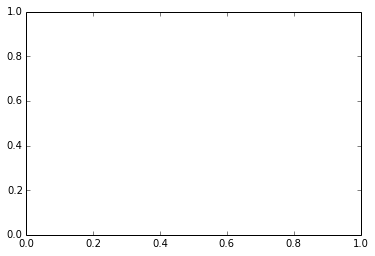

In [9]:
lineitem_df.plot(kind='scatter', x='1_quantity', y='1_extendedprice')